### Project 2 _Topic modelling_Harshini Tammareddy


In [1]:
## Dependencies
import warnings
warnings.filterwarnings("ignore")
## for graphs
import matplotlib.pyplot as plt
from plotnine import *
import seaborn as sns
%matplotlib inline
from sklearn.tree import export_graphviz
import graphviz
from wordcloud import WordCloud
import missingno as miss
import re
import string
import pickle
# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
# Read in data
un_data = pd.read_csv("un_gen_debates_text.csv")
un_data

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
...,...,...,...,...,...,...,...
7502,70,2015,YEM,Yemen,Mr. Abdrabuh Mansour Hadi Mansour,President,On behalf of the people and the Government of ...
7503,70,2015,YUG,Yugoslavia,Mr. Tomislav Nikolić,President,\nSeventy years have passed since the establis...
7504,70,2015,ZAF,South Africa,Jacob Zuma,President,I should like to congratulate the President an...
7505,70,2015,ZMB,Zambia,Mr. Edgar Chagwa Lungu,President,I would like to begin by thanking the Secretar...


In [3]:
un_data.value_counts("year")

year
2012    195
2011    194
2014    194
2015    193
2009    193
2006    193
2013    193
2008    192
2004    192
2007    191
2010    189
2003    189
2001    189
2002    188
2005    185
1999    181
1998    181
1996    181
1994    178
2000    178
1997    176
1993    175
1995    172
1992    167
1991    162
1990    156
1988    154
1989    153
1987    152
1984    150
1983    149
1986    149
1980    149
1982    147
1981    145
1979    144
1978    141
1977    140
1985    137
1976    134
1974    129
1975    126
1972    125
1973    120
1971    116
1970     70
dtype: int64

In [4]:
un_data.value_counts("country_name")

country_name
Ghana             46
Mexico            46
Rwanda            46
Colombia          46
Albania           46
                  ..
Timor-Leste       13
Kiribati          13
Montenegro        10
South Sudan        5
European Union     5
Length: 199, dtype: int64

In [5]:
un_data.value_counts("position")

position
Minister for Foreign Affairs                                                                                        1813
President                                                                                                           1143
Prime Minister                                                                                                       524
UN Representative                                                                                                    276
Deputy Prime Minister                                                                                                229
                                                                                                                    ... 
Head of State and Commander-in-Chief of the Armed Forces                                                               1
Head  of the goverment                                                                                                 1
Foreign Minister       

In [6]:
un_data.dtypes

session          int64
year             int64
country         object
country_name    object
speaker         object
position        object
text            object
dtype: object

In [7]:
#checking how much invalid data exists
total = un_data.isnull().sum().sort_values(ascending=False)
percent = (un_data.isnull().sum()/un_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(39) 

,Total,Percent
position,3005,0.400293
speaker,27,0.003597
session,0,0.000000
year,0,0.000000
country,0,0.000000
country_name,0,0.000000
text,0,0.000000


In [8]:
## Output 
missing_data.to_csv("Missing.csv", sep=',',index=True)

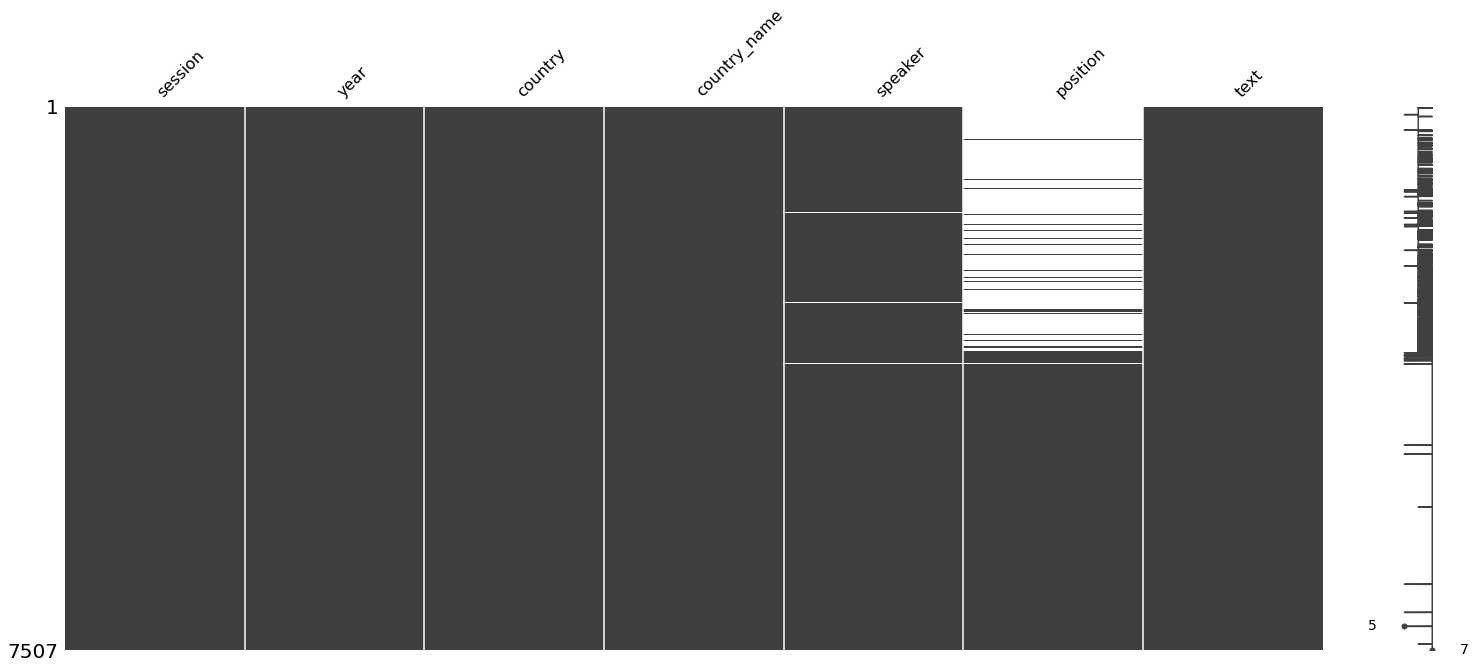

In [9]:
#Visualization
miss.matrix(un_data) 

In [10]:
## Processing 

In [11]:
## Variables chooses 
df = un_data[["country_name", "speaker", "text"]]
df

,country_name,speaker,text
0,Albania,Mr. NAS,33: May I first convey to our President the co...
1,Argentina,Mr. DE PABLO PARDO,177.\t : It is a fortunate coincidence that pr...
2,Australia,Mr. McMAHON,100.\t It is a pleasure for me to extend to y...
3,Austria,Mr. KIRCHSCHLAEGER,155.\t May I begin by expressing to Ambassado...
4,Belgium,Mr. HARMEL,"176. No doubt each of us, before coming up to ..."
...,...,...,...
7502,Yemen,Mr. Abdrabuh Mansour Hadi Mansour,On behalf of the people and the Government of ...
7503,Yugoslavia,Mr. Tomislav Nikolić,\nSeventy years have passed since the establis...
7504,South Africa,Jacob Zuma,I should like to congratulate the President an...
7505,Zambia,Mr. Edgar Chagwa Lungu,I would like to begin by thanking the Secretar...


In [12]:
df.dtypes

country_name    object
speaker         object
text            object
dtype: object

In [13]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stopword = set(stopwords.words('english'))
print(stopword)

{'himself', 'into', 'down', 'should', 'up', 's', "hasn't", "won't", 'haven', "wouldn't", 'in', "didn't", 'between', 'our', "hadn't", 'ours', 'and', "needn't", 'isn', 'am', 'him', 'mustn', 'or', "haven't", 'these', 'against', "mightn't", "weren't", 'there', 'each', 'couldn', 'that', 'who', 'yourselves', 'under', 'no', "you'd", 'only', "it's", "you've", 'which', 'had', 'shan', 'wasn', 'because', 'their', 'was', 'again', 't', 'aren', 'were', 'at', 'all', 'do', 'an', 'be', 'her', 'he', "mustn't", "you'll", 'didn', 'shouldn', 'theirs', 'by', 'you', 'itself', 'what', 'off', "she's", 'on', 'as', 'over', 'mightn', 'most', "couldn't", 'here', 'very', 'too', 'his', 're', "wasn't", 'it', 'whom', 'when', 'before', 'but', 'hasn', 'more', 'not', 'herself', 'nor', 'being', 'them', 'some', "that'll", 'above', 'through', 'until', 'wouldn', 'ourselves', 'they', 'where', 'd', 'now', 'doing', 'doesn', "doesn't", "isn't", 'we', 'those', 'ma', 'have', 'after', 'having', 've', "aren't", 'its', 'won', 'yourse

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VIOLIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VIOLIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VIOLIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
## text processing 
def process_texts(text):
  
    #Remove punctuations
    text = text.translate(str.maketrans("","",string.punctuation))
    
    #tokenizing words
    tokens = word_tokenize(text)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stopword]
     #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [15]:
df["processed1"] = df['text'].apply(lambda x: process_texts(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


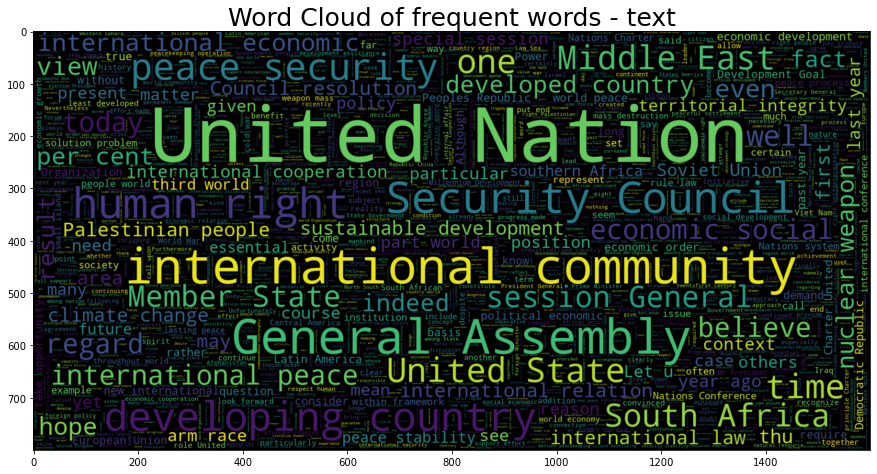

In [16]:
## Word clouds 
## Other tweets word cloud
## for graphs
import matplotlib.pyplot as plt
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df["processed1"]))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word Cloud of frequent words - text',fontsize=25)
plt.savefig("Word cloud 00.png")

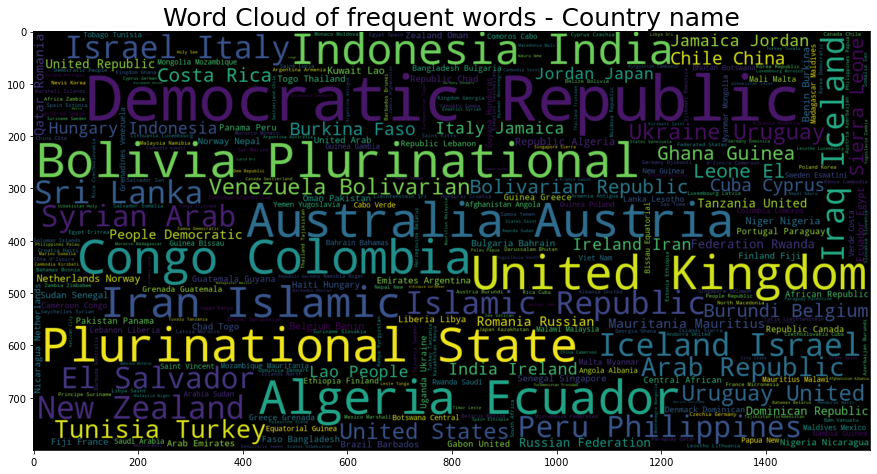

In [17]:
## Word clouds 
## Other tweets word cloud
## for graphs
import matplotlib.pyplot as plt
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df["country_name"]))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word Cloud of frequent words - Country name',fontsize=25)
plt.savefig("Word cloud 0.png")

In [18]:
## Dropping plurinational state 


In [19]:
df = df[(df["country_name"] != "Plurinational State") | (df["country_name"] != "Plurinational")]


In [20]:
# 1 Instantiate vectorizer
vec = CountVectorizer(stop_words="english",
                    lowercase=True,
                    ngram_range=(1, 1), # lower bound,upper bound: 1,1 only unigrams, 1,2 unigrams and bigrams, 2,2 only bigrams, etc...,
                    min_df=5, # ignore rare words (appear in less than 5 documents)
                    max_df=0.7) # ignore common words (appear in more than 70% of documents)

In [21]:
# 2 Create dtm
X = vec.fit_transform(df["text"])

In [22]:
# 3 Instantiate LDA
lda = LatentDirichletAllocation(n_components=4,
                                       random_state=42)

In [23]:
# 4
doc_topics = lda.fit_transform(X)

In [24]:
import pyLDAvis.sklearn
lda_viz = pyLDAvis.sklearn.prepare(lda_model=lda,
                                  dtm=X,
                                  vectorizer=vec,
                                  sort_topics=False)

In [25]:
pyLDAvis.display(lda_viz)

# pyLDAvis
# Left panel: 
    # global view of topic model
    # centers of circle are distance between topics then projected onto two dimensions
    # area of circles is the overall prevalence of the topic in the whole topic model
    # examine how prevalent each topic is
    # examine how topics relate to each other
# Right panel:
    # Bars represent individual terms that are most useful for interpreting selected topic on left
    # Blue bar represents corpus wide frequencies
    # Red bar represents topic-specific frequencies
    # examine the meaning of each topic

### Part 2   Head of the state

In [26]:
un_df = un_data[(un_data["position"] == "President") | (un_data["position"] == "Prime Minister")]
un_df

,session,year,country,country_name,speaker,position,text
435,29,1974,AUS,Australia,Mr. E.G. Whithlam,Prime Minister,"Mr. President, in this year in which Australia..."
441,29,1974,BGD,Bangladesh,Sheikh Mujibur Rahman,Prime Minister,Today as I stand before this Assembly I share ...
462,29,1974,CYP,Cyprus,Archbishop Makarios,President,"Mr. President, may I in the first place expres..."
494,29,1974,ITA,Italy,Mr. Plaja,Prime Minister,"215.\t Mr. President, I should like first of a..."
499,29,1974,KHM,Cambodia,Mr. Long Boret,Prime Minister,I am very happy to be able to associate myself...
...,...,...,...,...,...,...,...
7502,70,2015,YEM,Yemen,Mr. Abdrabuh Mansour Hadi Mansour,President,On behalf of the people and the Government of ...
7503,70,2015,YUG,Yugoslavia,Mr. Tomislav Nikolić,President,\nSeventy years have passed since the establis...
7504,70,2015,ZAF,South Africa,Jacob Zuma,President,I should like to congratulate the President an...
7505,70,2015,ZMB,Zambia,Mr. Edgar Chagwa Lungu,President,I would like to begin by thanking the Secretar...


In [27]:
# 2 Create dtm
X = vec.fit_transform(un_df["text"])

In [28]:
# CHECK: Documents, terms
X.shape

(1667, 13361)

In [29]:
# 3 Instantiate LDA
lda = LatentDirichletAllocation(n_components=4,
                                       random_state=42)

In [30]:
# 4
doc_topics = lda.fit_transform(X)

In [31]:
import pyLDAvis.sklearn
lda_viz = pyLDAvis.sklearn.prepare(lda_model=lda,
                                  dtm=X,
                                  vectorizer=vec,
                                  sort_topics=False)

In [32]:
import pyLDAvis.sklearn
lda_viz = pyLDAvis.sklearn.prepare(lda_model=lda,
                                  dtm=X,
                                  vectorizer=vec,
                                  sort_topics=False)

In [33]:
pyLDAvis.display(lda_viz)

# pyLDAvis
# Left panel: 
    # global view of topic model
    # centers of circle are distance between topics then projected onto two dimensions
    # area of circles is the overall prevalence of the topic in the whole topic model
    # examine how prevalent each topic is
    # examine how topics relate to each other
# Right panel:
    # Bars represent individual terms that are most useful for interpreting selected topic on left
    # Blue bar represents corpus wide frequencies
    # Red bar represents topic-specific frequencies
    # examine the meaning of each topic